<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/Countries_Autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@curiousily/making-a-predictive-keyboard-using-recurrent-neural-networks-tensorflow-for-hackers-part-v-3f238d824218

In [6]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5

Using TensorFlow backend.


In [7]:
import pandas as pd
import io

file_name = 'https://github.com/babakansari/DeepLearning/blob/master/Countries.xlsx?raw=true'

df = pd.read_excel(file_name)
df

,Name,Ext
0,Afghanistan (AF),NaN
1,Aland Islands (AX),NaN
2,Albania (AL),NaN
3,Algeria (DZ),NaN
4,American Samoa (AS),NaN
...,...,...
254,Wallis and Futuna (WF),NaN
255,Western Sahara (EH),NaN
256,Yemen (YE),NaN
257,Zambia (ZM),NaN


In [0]:
text = ""
for index, row in df.iterrows():
  text = text + row['Name'].lower()

chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [22]:
print(f'unique chars: {len(chars)}')

unique chars: 34


In [45]:
SEQUENCE_LENGTH = 3
step = 1
sentences = []
next_chars = []
for index, row in df.iterrows():
  country = row['Name'].lower()
  for i in range(0, len(country) - SEQUENCE_LENGTH, step):
    sentences.append(country[i: i + SEQUENCE_LENGTH])
    next_chars.append(country[i + SEQUENCE_LENGTH])

print(f'num training examples: {len(sentences)}')

num training examples: 2913


In [44]:
print("After '" + sentences[0] + "' is '" + next_chars[0] + "' for one sample")

After 'afg' is 'h' for one sample


In [0]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Model

In [55]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               83456     
_________________________________________________________________
dense_2 (Dense)              (None, 34)                4386      
_________________________________________________________________
activation_2 (Activation)    (None, 34)                0         
Total params: 87,842
Trainable params: 87,842
Non-trainable params: 0
_________________________________________________________________


# Training

In [56]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2767 samples, validate on 146 samples
Epoch 1/20





2767/2767 [==============================] - 5s 2ms/step - loss: 2.7305 - acc: 0.2548 - val_loss: 2.5685 - val_acc: 0.3630
Epoch 2/20
2767/2767 [==============================] - 0s 100us/step - loss: 2.3256 - acc: 0.3354 - val_loss: 2.4995 - val_acc: 0.3562
Epoch 3/20
2767/2767 [==============================] - 0s 97us/step - loss: 2.2171 - acc: 0.3759 - val_loss: 2.4862 - val_acc: 0.3699
Epoch 4/20
2767/2767 [==============================] - 0s 105us/step - loss: 2.1241 - acc: 0.3921 - val_loss: 2.4875 - val_acc: 0.3562
Epoch 5/20
2767/2767 [==============================] - 0s 98us/step - loss: 2.0639 - acc: 0.4095 - val_loss: 2.4162 - val_acc: 0.3767
Epoch 6/20
2767/2767 [==============================] - 0s 101us/step - loss: 1.9991 - acc: 0.4221 - val_loss: 2.4359 - val_acc: 0.3973
Epoch 7/20
2767/2767 [===============

## Saving the model

In [0]:
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

## Evaluation

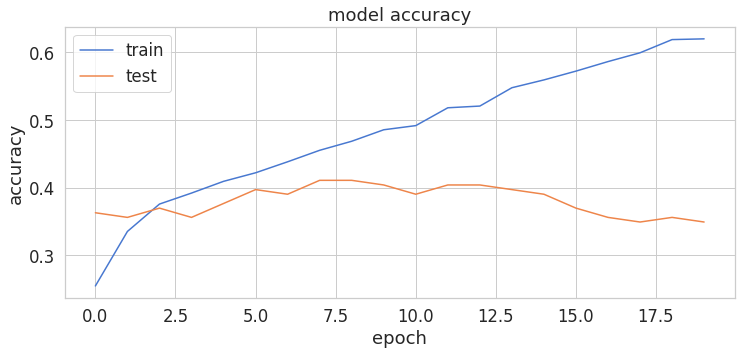

In [58]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

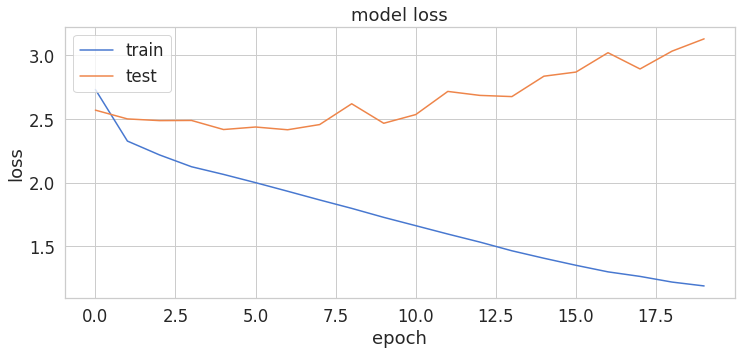

In [59]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');